## 가상의 상황에서 큐를 사용해 봅시다.
뜨거운 감자([Hot potato](https://en.wikipedia.org/wiki/Hot_potato_(game))라는 미니 게임을 통해서 데이터가 FIFO 방식으로 관리되는 상황을 살펴보자.  

### 뜨거운 감자 게임 룰
1. 둥글게 모인 아이들은 바로 옆에 있는 친구에게만 감자(item)을 전달할 수 있다. 
2. 실행이 멈췄을때 아이템을 갖고 있는 아이는 그룹에서 빠진다.
3. 위 단계는 마지막 1명의 아이가 남을때까지 계속된다.

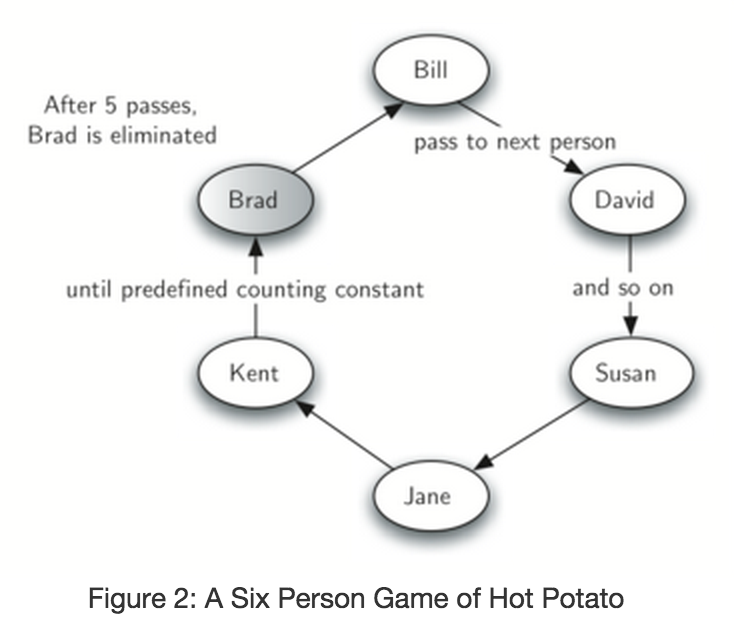

In [6]:
from IPython.display import Image
Image(filename='./img/hotpotato_1.png', retina=True)

### 구현
- 아이들의 이름(name)을 입력받는 리스트(list)
- 아이템(item, 감자=)을 다음 사람에게 전달할 횟수를 갖는 "num" 변수
- num 에 의해 반복해서 아이템을 전달하고, 마지막에 남은 아이의 이름(name)을 반환(return)
- 둥글게 모여 있는 모습은 큐(queue)를 사용
- 큐의 front에 있는 아이가 아이템를 가지고 있는 것으로 가정
- front에서 빠지면(dequeue) 바로 rear로 추가(enqueue)
- num 만큼 dequeue / enqueue가 반복된 후 front에 남은 아이는 리스트에서 빠지고, 위 반복을 다시 수행함
- 위 프로세스는 큐 안에 이름이 1개 남을때까지 계속됨

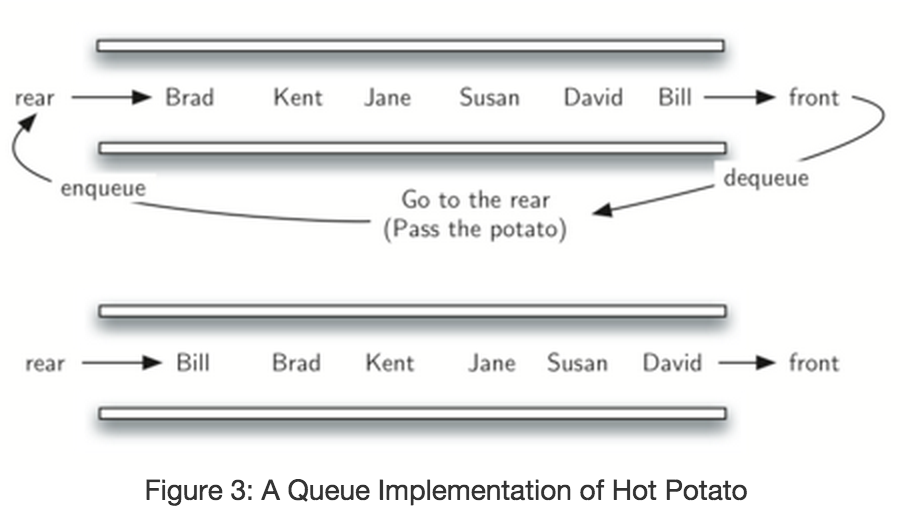

In [7]:
Image(filename='./img/hotpotato_2.png', retina=True)

### 파이썬으로 구현

In [32]:
from pythonds.basic.queue import Queue

def hot_potato(name_list, num):
    circle = Queue()
    
    for name in name_list:
        circle.enqueue(name)
        
    while circle.size() > 1:
        for i in range(num):
            front = circle.dequeue()
            circle.enqueue(front)
            print(" > ".join(circle.items))
            
        # 반복(num 만큼)이 종료 되었을때 감자를 들고 있는(front) 아이가 빠짐
        out = circle.dequeue()
        print("탈락: {}\n".format(out))
        print(circle.items)
        print("\n")
        
    return circle.dequeue()

In [36]:
children_list = [
    'jaeyoon',
    'jinsoo',
    'dooseon',
    'donghwan',
    'jaeho',
    'dongwoo',
    'eunwoo',
    'dongwon'
]

hot_potato(children_list, 3)

jaeyoon > dongwon > eunwoo > dongwoo > jaeho > donghwan > dooseon > jinsoo
jinsoo > jaeyoon > dongwon > eunwoo > dongwoo > jaeho > donghwan > dooseon
dooseon > jinsoo > jaeyoon > dongwon > eunwoo > dongwoo > jaeho > donghwan
탈락: donghwan

['dooseon', 'jinsoo', 'jaeyoon', 'dongwon', 'eunwoo', 'dongwoo', 'jaeho']


jaeho > dooseon > jinsoo > jaeyoon > dongwon > eunwoo > dongwoo
dongwoo > jaeho > dooseon > jinsoo > jaeyoon > dongwon > eunwoo
eunwoo > dongwoo > jaeho > dooseon > jinsoo > jaeyoon > dongwon
탈락: dongwon

['eunwoo', 'dongwoo', 'jaeho', 'dooseon', 'jinsoo', 'jaeyoon']


jaeyoon > eunwoo > dongwoo > jaeho > dooseon > jinsoo
jinsoo > jaeyoon > eunwoo > dongwoo > jaeho > dooseon
dooseon > jinsoo > jaeyoon > eunwoo > dongwoo > jaeho
탈락: jaeho

['dooseon', 'jinsoo', 'jaeyoon', 'eunwoo', 'dongwoo']


dongwoo > dooseon > jinsoo > jaeyoon > eunwoo
eunwoo > dongwoo > dooseon > jinsoo > jaeyoon
jaeyoon > eunwoo > dongwoo > dooseon > jinsoo
탈락: jinsoo

['jaeyoon', 'eunwoo', 'dongwoo', 'do

'dongwoo'